In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
from gatspy.periodic import LombScargleFast
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
from sqlite3 import *
import random

In [2]:
#conn = connect('minion_1016_sqlite.db')
conn = connect('astro_lsst_01_1004_sqlite.db')

In [3]:
x2 = [(630,)] # field containing gx 339-4
L = [0]*len(x2)
z = 0
c = conn.cursor()
#t = [('357',),('356',)]
for z in range(0,len(x2)):
    i = x2[z]    
    #c.execute('SELECT expMJD, Field_fieldID, filter FROM ObsHistory WHERE Field_fieldID = ?',i)
    #k = c.fetchall()
    c.execute('SELECT expMJD FROM ObsHistory WHERE Field_fieldID = ?', i)
    allobs = c.fetchall()
    totalnumber = len(allobs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "u" AND Field_fieldID = ?', i)
    uobs= c.fetchall()
    utot = len(uobs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "g" AND Field_fieldID = ?', i)
    gobs = c.fetchall()
    gtot = len(gobs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "r" AND Field_fieldID = ?', i)
    robs = c.fetchall()
    rtot = len(robs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "i" AND Field_fieldID = ?', i)
    iobs = c.fetchall()
    itot = len(iobs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "z" AND Field_fieldID = ?', i)
    zobs = c.fetchall()
    ztot = len(zobs)
    c.execute('SELECT expMJD FROM ObsHistory WHERE filter = "y" AND Field_fieldID = ?', i)
    yobs = c.fetchall()
    utot = len(yobs)

In [4]:
obs = [allobs, uobs, gobs, robs, iobs, zobs, yobs]
for x in range(0, len(obs)):
    for y in range(0, len(obs[x])):
        obs[x][y] = np.mean(obs[x][y])
allobs2=[]
uobs2=[]
gobs2=[]
robs2=[]
iobs2=[]
zobs2=[]
yobs2=[]
obs2 = [allobs2, uobs2, gobs2, robs2, iobs2, zobs2, yobs2]
for x in range(0, len(obs)):
    obs2[x] = [t + (17/(3600*24)) for t in obs[x]]
    
for x in range(0, len(obs)):
    obs[x].extend(obs2[x])
#creates obs 17 secs after first

1690
116
164
370
372
334
334


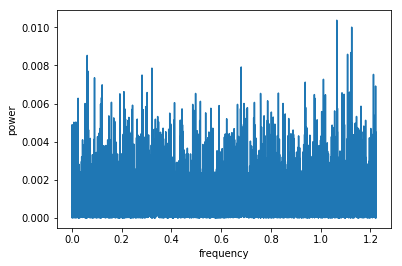

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0103671996754
[ 0.14947556] d


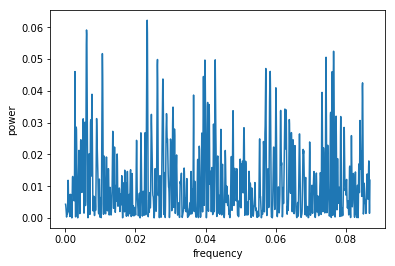

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.0622321361313
[ 6.81742077] d


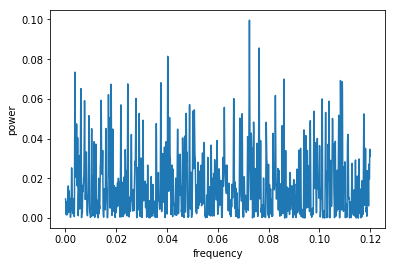

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0996175246424
[ 2.1973423] d


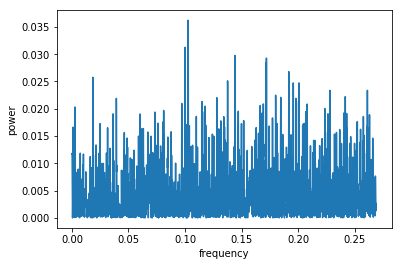

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0362230834771
[ 1.54859426] d


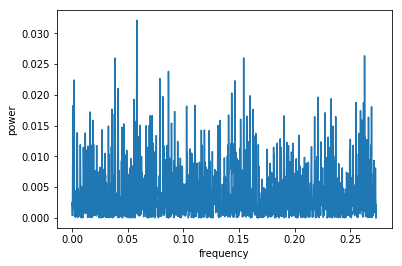

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0321027018441
[ 2.72839841] d


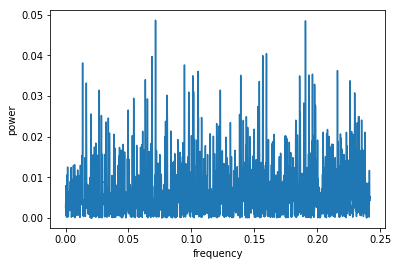

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0486590207281
[ 2.2268771] d


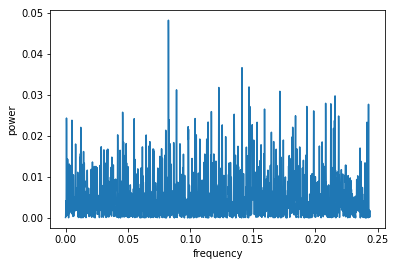

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0482347677733
[ 1.9308166] d
1690
116
164
370
372
334
334


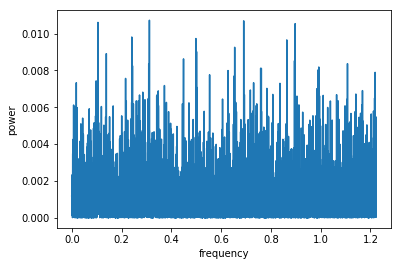

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0107194428369
[ 0.51027003] d


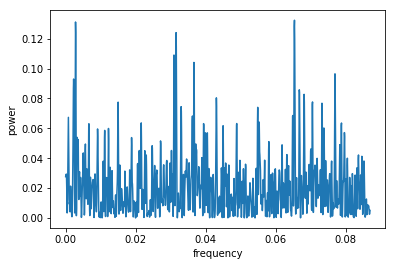

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.132323694532
[ 2.4350164] d


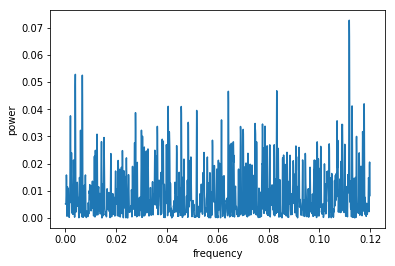

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0727904370857
[ 1.42444828] d


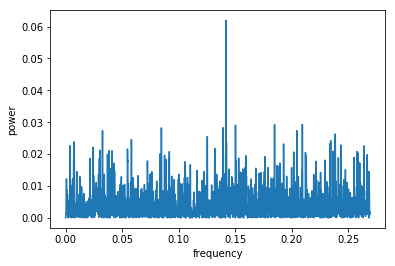

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0619756141843
[ 1.12229406] d


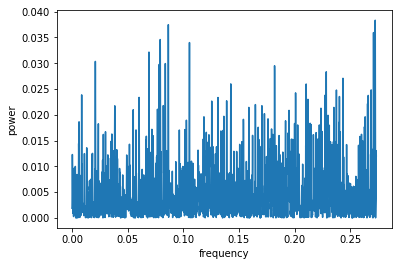

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0383416745791
[ 0.58429937] d


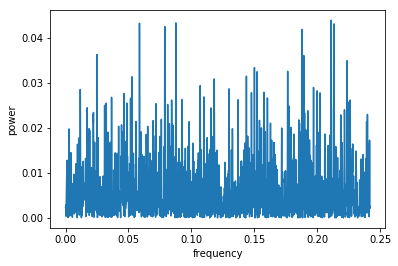

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0439405754874
[ 0.75430917] d


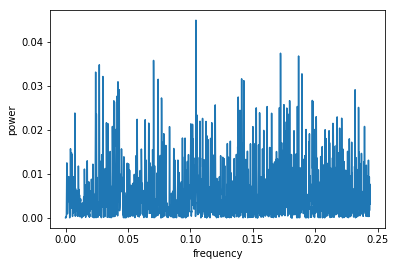

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.044836130938
[ 1.52381752] d
1690
116
164
370
372
334
334


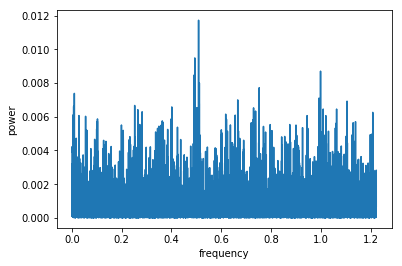

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0117242518399
[ 0.31269747] d


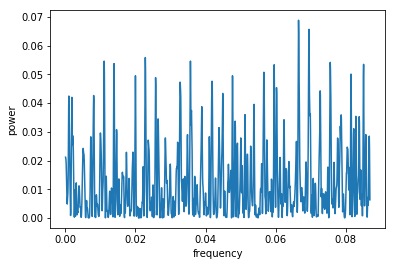

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.068848849162
[ 2.39116199] d


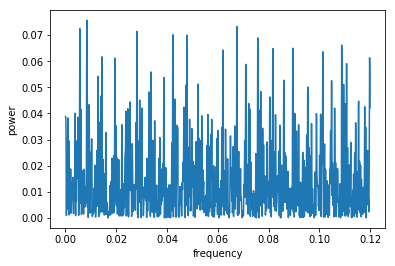

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0756899086253
[ 18.96451876] d


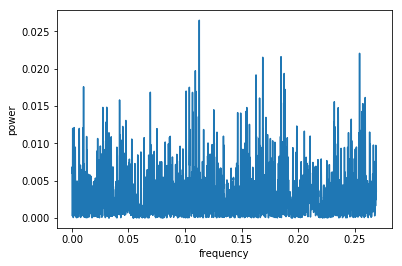

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0264897647417
[ 1.4133773] d


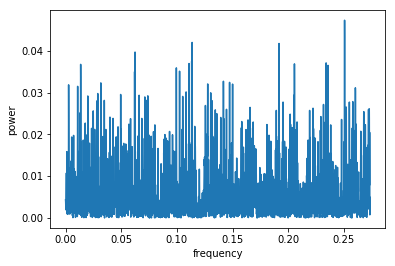

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0473267509801
[ 0.63514376] d


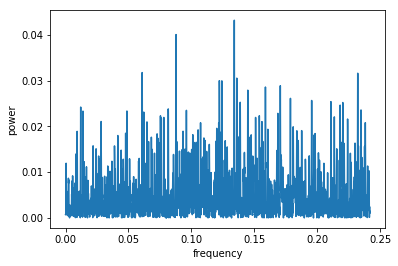

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0431634683118
[ 1.18725104] d


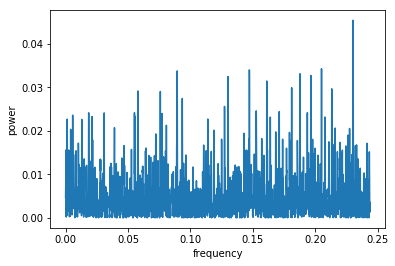

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0454012618449
[ 0.69109868] d
1690
116
164
370
372
334
334


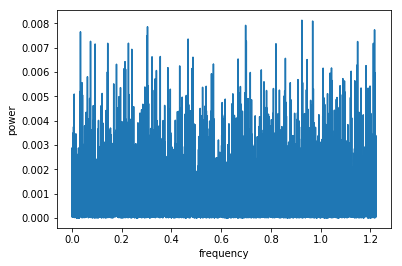

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0081337563988
[ 0.17212408] d


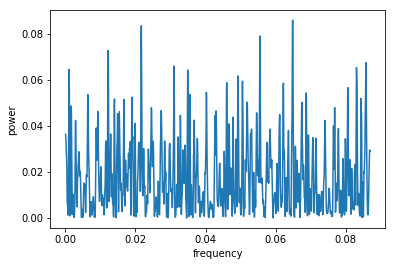

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.086030979301
[ 2.45301191] d


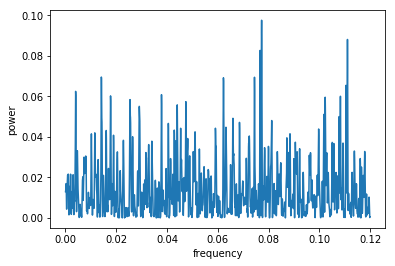

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.097631328683
[ 2.06089242] d


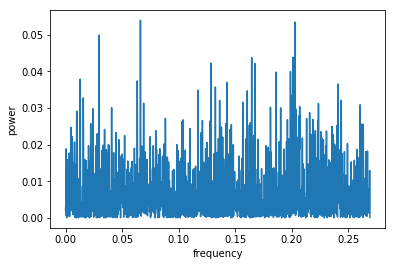

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0539699722538
[ 2.40280348] d


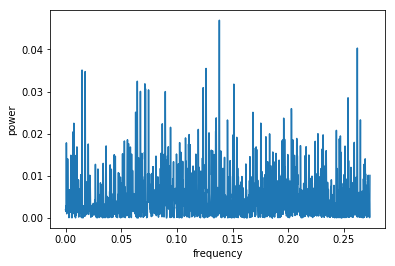

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0469137691682
[ 1.15206782] d


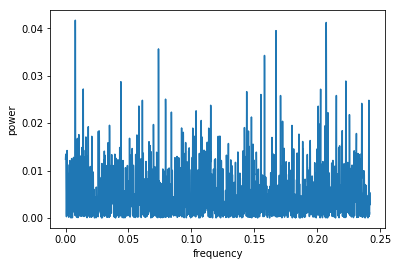

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0416931336499
[ 20.43925488] d


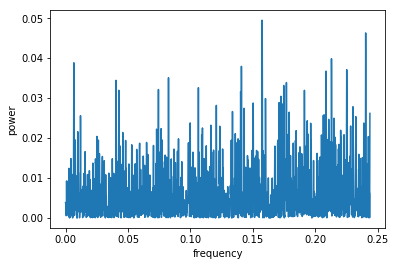

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0494800291067
[ 1.01069818] d
1690
116
164
370
372
334
334


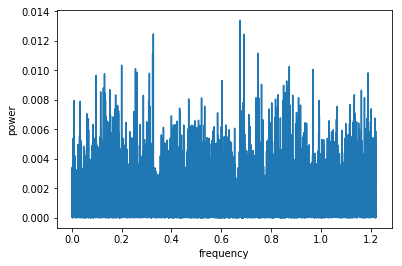

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.013397943928
[ 0.2355782] d


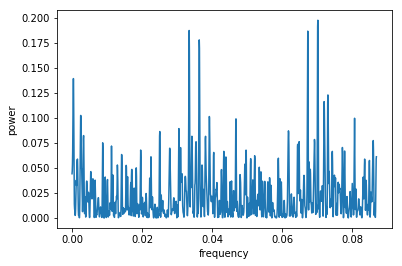

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.197799562576
[ 2.26665419] d


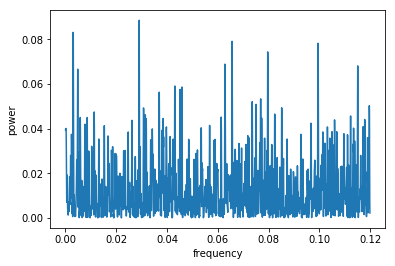

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0884733679321
[ 5.48118518] d


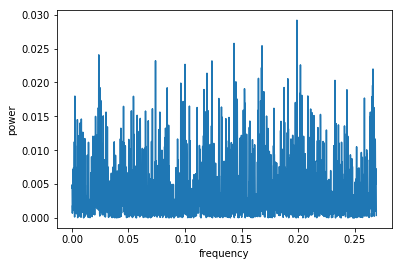

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0291861238047
[ 0.80023161] d


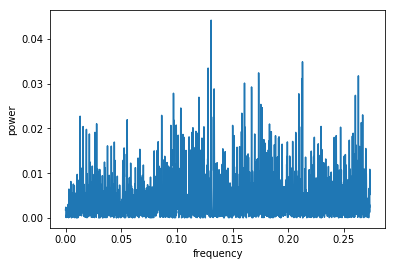

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0442039039524
[ 1.21677619] d


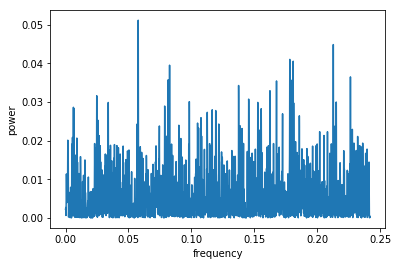

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0511753394451
[ 2.75596971] d


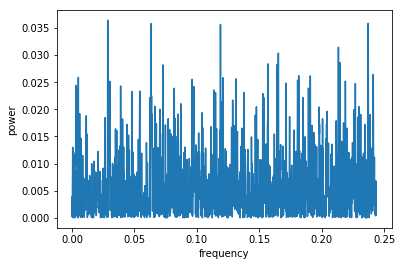

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0364137110028
[ 5.54495959] d
1690
116
164
370
372
334
334


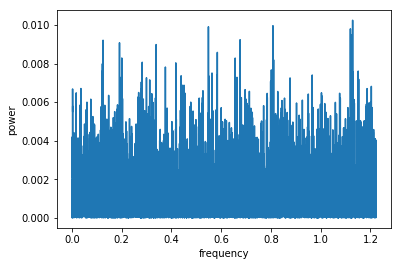

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0102452750408
[ 0.14103269] d


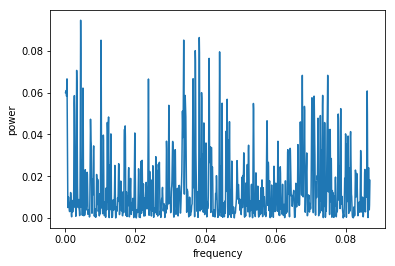

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.0946740403463
[ 36.62600536] d


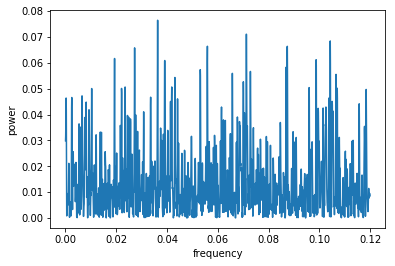

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0764724010854
[ 4.38583149] d


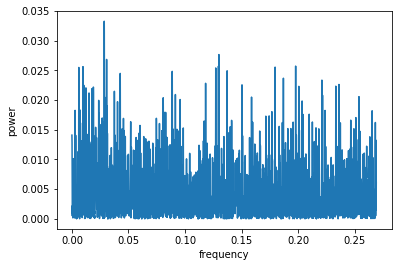

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0332644064536
[ 5.56580217] d


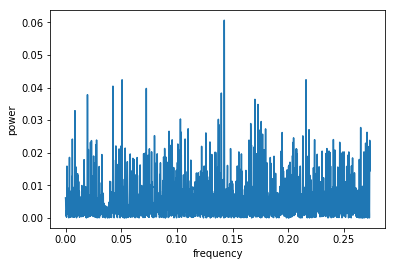

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0606285289794
[ 1.11644421] d


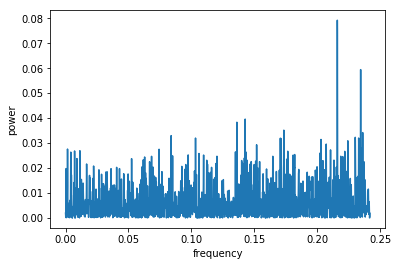

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0792206763961
[ 0.73731522] d


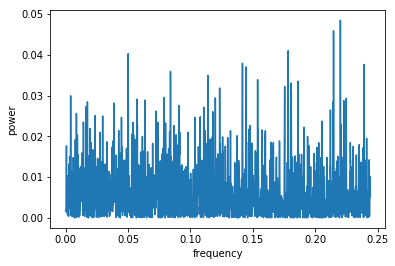

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0484757062975
[ 0.72299977] d
1690
116
164
370
372
334
334


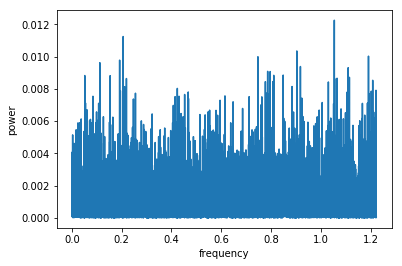

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0122480264957
[ 0.15093638] d


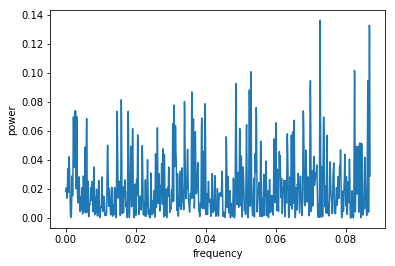

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.136104382758
[ 2.19000857] d


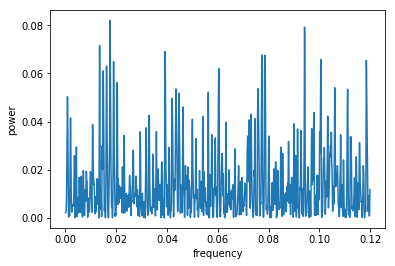

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.082065210174
[ 9.08650565] d


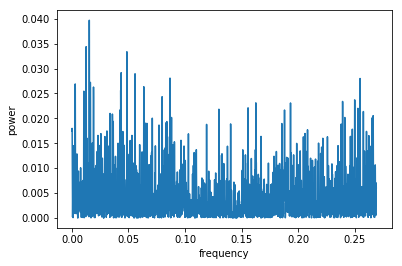

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0397060737313
[ 10.34250195] d


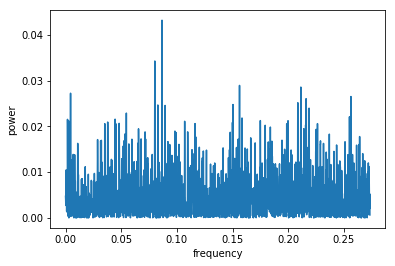

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.043189589235
[ 1.83651097] d


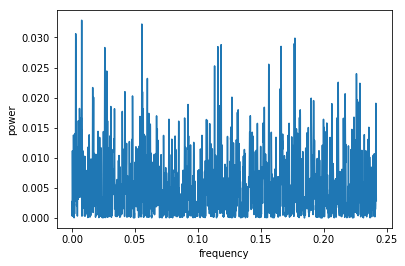

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0328680613811
[ 20.43925488] d


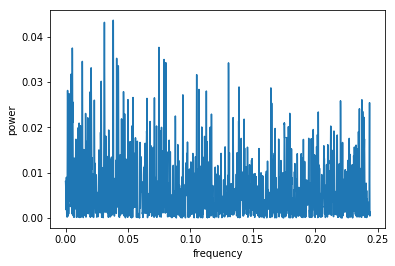

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0436729752629
[ 4.16401472] d
1690
116
164
370
372
334
334


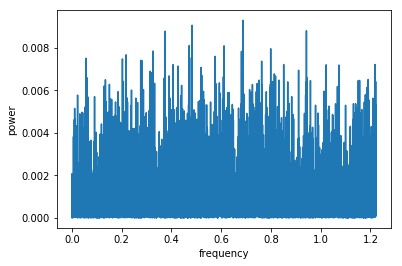

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.00930075599598
[ 0.23129694] d


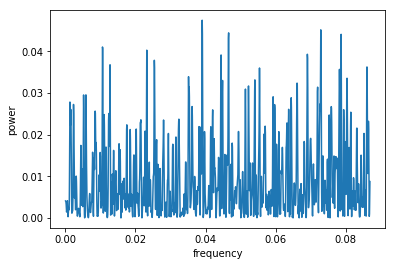

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.0474693814777
[ 4.07580259] d


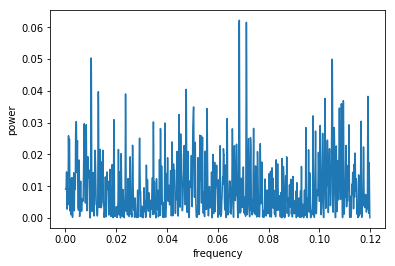

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.062255363312
[ 2.32499653] d


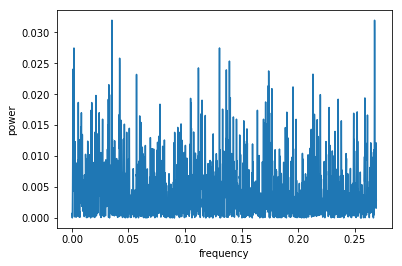

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0319494431787
[ 4.4956315] d


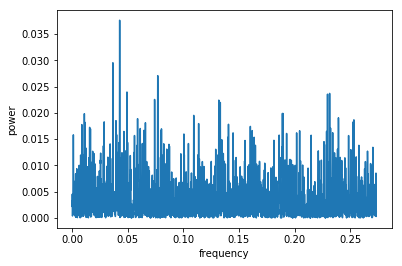

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0376210169797
[ 3.71204307] d


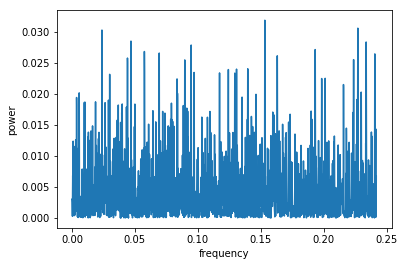

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0318183887607
[ 1.03876054] d


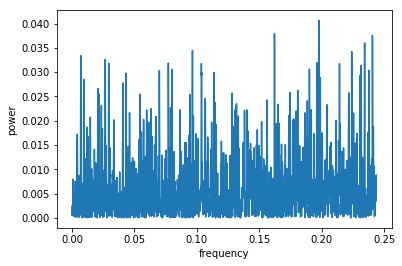

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0406751543448
[ 0.80476824] d
1690
116
164
370
372
334
334


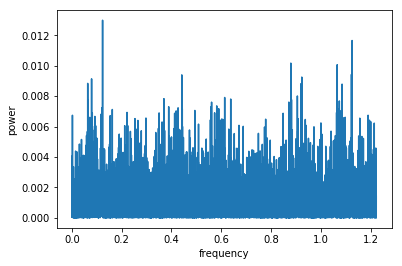

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0129810319981
[ 1.29155733] d


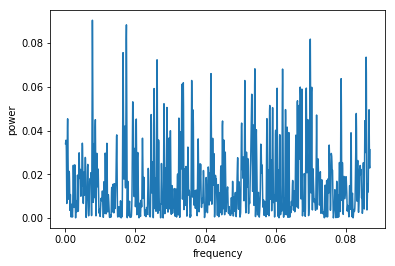

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.0904609821936
[ 20.66447773] d


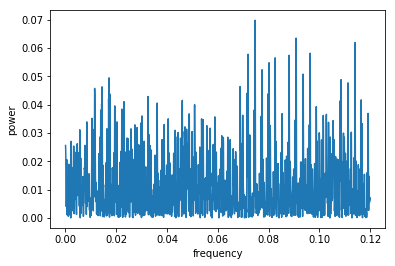

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0697474258044
[ 2.13192984] d


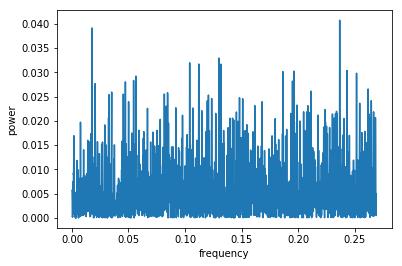

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0407391096729
[ 0.67238338] d


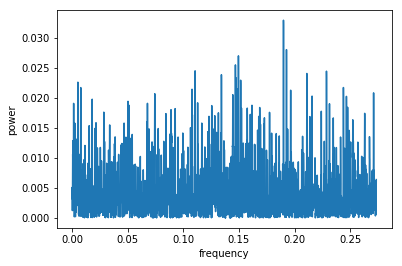

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0329832402315
[ 0.83772171] d


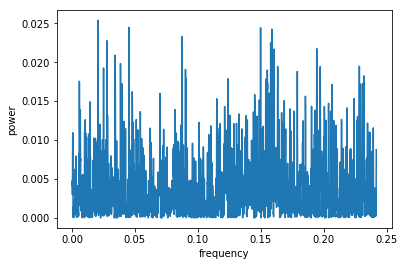

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.0253946648919
[ 7.62574142] d


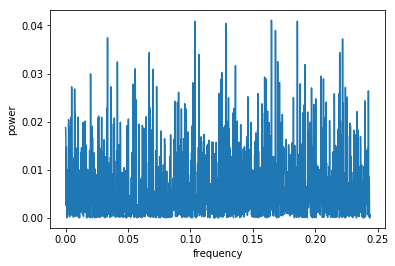

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0410785199205
[ 0.96489561] d
1690
116
164
370
372
334
334


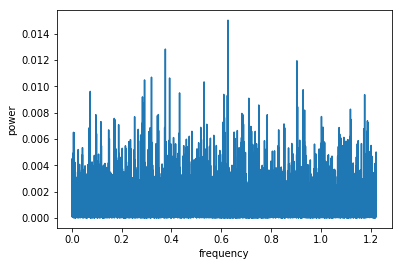

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
0.0150311061607
[ 0.25371047] d


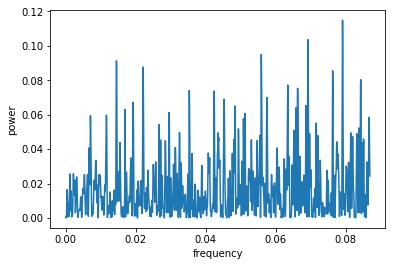

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
0.11489913285
[ 2.01241788] d


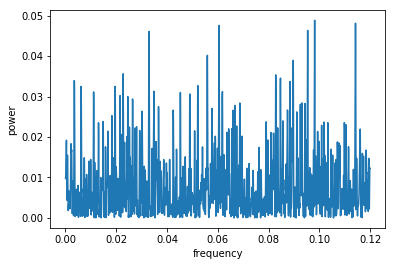

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
0.0488530427579
[ 1.62230011] d


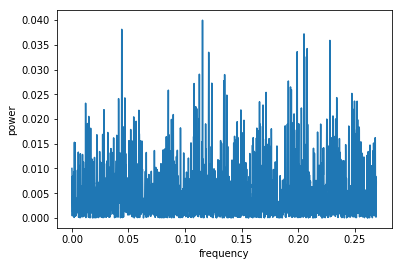

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
0.0399786325978
[ 1.3784791] d


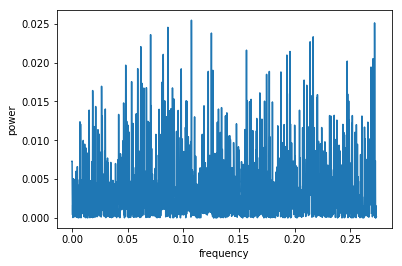

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
0.0254431547943
[ 1.48258167] d


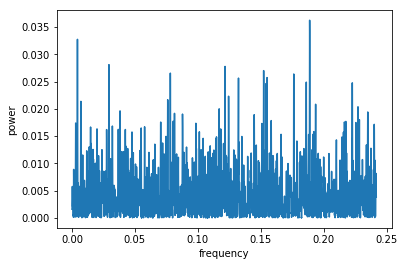

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
0.036253951156
[ 0.84288817] d


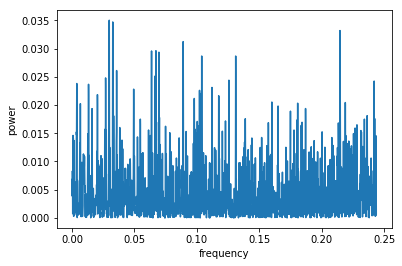

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
0.0350049630308
[ 5.31775149] d
1690
116
164
370
372
334
334


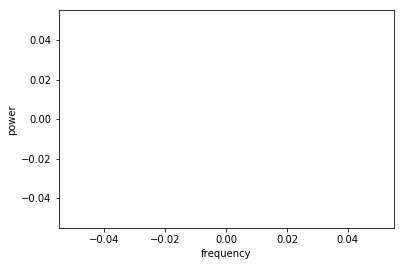

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   8.17713811e-01
   8.17675102e-01   8.17636396e-01] d
nan
[] d


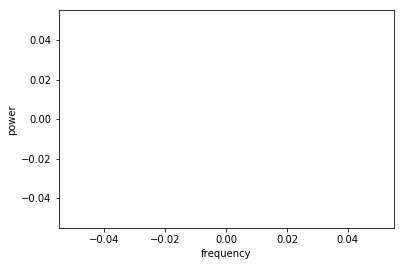

[  3.33685569e+04   1.11228523e+04   6.67371138e+03 ...,   1.15183144e+01
   1.15103680e+01   1.15024326e+01] d
nan
[] d


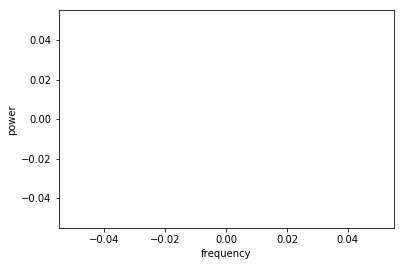

[  3.41982271e+04   1.13994090e+04   6.83964541e+03 ...,   8.35121540e+00
   8.34713866e+00   8.34306589e+00] d
nan
[] d


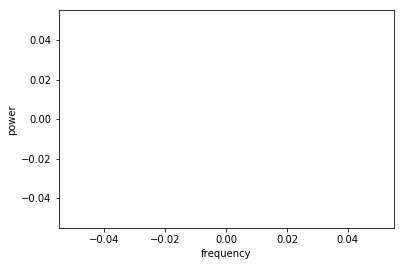

[  3.43764600e+04   1.14588200e+04   6.87529200e+03 ...,   3.71838399e+00
   3.71757975e+00   3.71677587e+00] d
nan
[] d


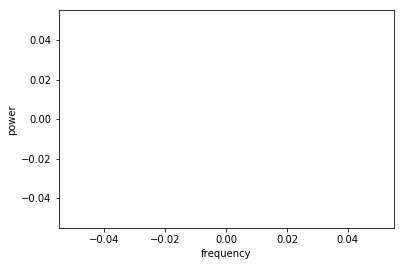

[  3.40289201e+04   1.13429734e+04   6.80578402e+03 ...,   3.66020438e+00
   3.65941715e+00   3.65863026e+00] d
nan
[] d


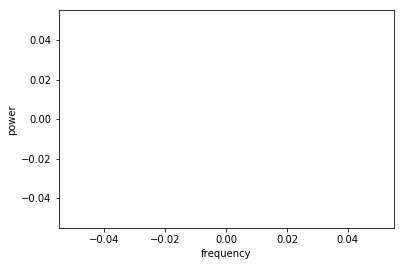

[  3.45459554e+04   1.15153185e+04   6.90919108e+03 ...,   4.13872713e+00
   4.13773570e+00   4.13674475e+00] d
nan
[] d


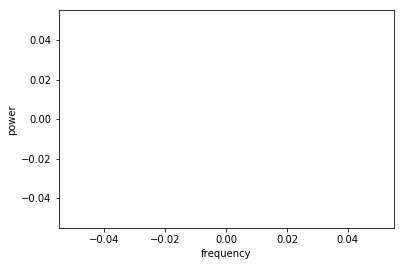

[  3.42477285e+04   1.14159095e+04   6.84954569e+03 ...,   4.10398184e+00
   4.10299850e+00   4.10201563e+00] d
nan
[] d


ZeroDivisionError: integer division or modulo by zero

In [8]:


actualperiod = []
measuredperiod = []
measuredpower = []
for prange in range(0, 30):    
    allobsy=[]
    uobsy=[]
    gobsy=[]
    robsy=[]
    iobsy=[]
    zobsy=[]
    yobsy=[]
    y = [[], [], [], [], [], [], []]
    for z in range(0, len(y)):
        #y[z] = [np.sin((5/(1+(prange/2)))*(x-obs[z][0])) + (np.sin((5/(1+(prange/2)))*(x-obs[z][0]))*random.gauss(0, 0.5)) for x in obs[z]] # optical modulation
        fluxPerSec = []
        #print(y, y[z])
        for date in range(0, len(obs[z])):
            for seconds in range(0, 15):
                fluxPerSec.append(np.sin((5/(1+(prange/2)))*(obs[z][date]-obs[z][0]+seconds)))
            y[z].append(np.mean(fluxPerSec) + (np.sin((5/(1+(prange/2)))*(obs[z][date]-obs[z][0]+seconds))*random.gauss(0, 0.5)))
                
        print(len(y[z]))

    for z in range(0, len(y)):
        x = [x - obs[z][0] for x in obs[z]]
        x = x * u.day#
        amplitude = [0.1 * t for t in y[z]]
        frequency, power = LombScargle(x, amplitude).autopower()
        plt.plot(frequency, power)  
        plt.xlabel('frequency')
        plt.ylabel('power')
        plt.show()
        print(1/frequency)
        print(power.max())
        maxpos = [i for i, j in enumerate(power) if j == power.max()]
        period = (1/frequency[maxpos])/(2*np.pi)
        print(period)

    actualperiod.append(1/(5/(1+(prange/2))))
    measuredperiod.append(period)
    measuredpower.append(power.max())

In [ ]:
perfex = np.linspace(0, 3500, 3501)
perfect = [0.1*np.sin((5/(1+(prange/2)))*x) for x in perfex]

plt.plot(x, amplitude, 'o')
plt.plot(perfex, perfect)
plt.ylabel('Magnitude Variation')
plt.xlabel('Date (days)')
plt.xlim([1800, 2300])
plt.show()

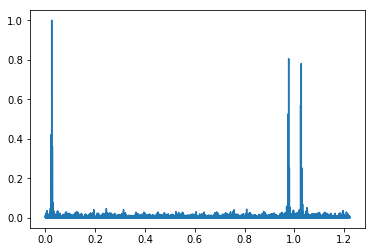

[  3.45459573e+04   1.15153191e+04   6.90919147e+03 ...,   8.17752571e-01
   8.17713858e-01   8.17675148e-01] d
0.99988989123276
[ 6.28361129] d


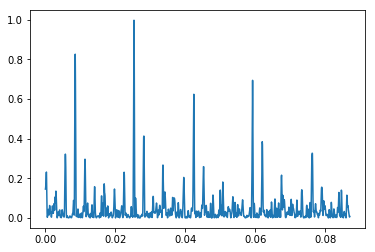

[  3.33685589e+04   1.11228530e+04   6.67371178e+03 ...,   1.15183151e+01
   1.15103687e+01   1.15024333e+01] d
0.9977808714566169
[ 6.2849362] d


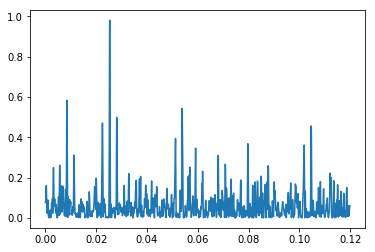

[  3.41982290e+04   1.13994097e+04   6.83964581e+03 ...,   8.35121588e+00
   8.34713914e+00   8.34306637e+00] d
0.9805394566937586
[ 6.27775917] d


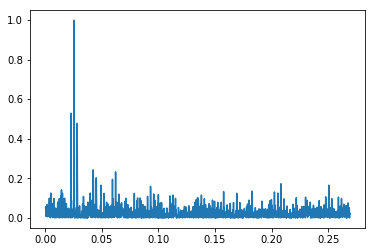

[  3.43764619e+04   1.14588206e+04   6.87529239e+03 ...,   3.71757997e+00
   3.71677608e+00   3.71597254e+00] d
0.9984392749934087
[ 6.28149695] d


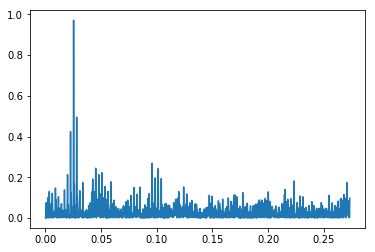

[  3.40289220e+04   1.13429740e+04   6.80578441e+03 ...,   3.66020459e+00
   3.65941736e+00   3.65863047e+00] d
0.97139538396699
[ 6.2902104] d


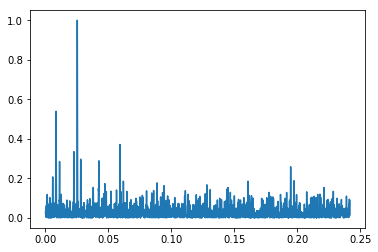

[  3.45459573e+04   1.15153191e+04   6.90919147e+03 ...,   4.13971927e+00
   4.13872737e+00   4.13773594e+00] d
0.9998818930049358
[ 6.28361129] d


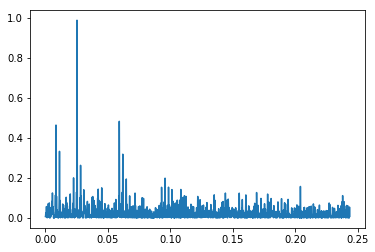

[  3.42477304e+04   1.14159101e+04   6.84954609e+03 ...,   4.10398208e+00
   4.10299873e+00   4.10201586e+00] d
0.9873813017920396
[ 6.28684612] d


In [76]:
for z in range(0, len(y)):
    x = [x - obs[z][0] for x in obs[z]]
    x = x * u.day
    amplitude = [0.1 * x for x in y[z]]
    frequency, power = LombScargle(x, amplitude).autopower()
    plt.plot(frequency, power) 
    plt.xlabel('frequency')
    plt.ylabel('power')
    plt.show()
    print(1/frequency)
    print(power.max())
    maxpos = [i for i, j in enumerate(power) if j == power.max()]
    period = (1/frequency[maxpos])/(2*np.pi)
    print(period)

In [90]:
for s in range(0, len(y)):
    print(len(y[s]))

1690
116
164
370
372
334
334


In [92]:
for prange in range(0, 30): 
    for z in range(0, len(y)):
        print(5/(1+(prange/2)))


5.0
5.0
5.0
5.0
5.0
5.0
5.0
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
3.3333333333333335
2.5
2.5
2.5
2.5
2.5
2.5
2.5
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.25
1.25
1.25
1.25
1.25
1.25
1.25
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.9090909090909091
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.7692307692307693
0.7692307692307693
0.769230769230769

In [98]:
print(actualperiod)

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8999999999999999, 1.0, 1.1, 1.2, 1.2999999999999998, 1.4, 1.5, 1.6, 1.7, 1.7999999999999998, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4, 2.5, 2.5999999999999996, 2.7, 2.8, 2.9, 3.0, 3.1]


In [99]:
print(measuredperiod)

[<Quantity [ 0.76889485] d>, <Quantity [ 1.41392882] d>, <Quantity [ 0.68588091] d>, <Quantity [ 1.04439463] d>, <Quantity [ 0.68778493] d>, <Quantity [ 0.69997375] d>, <Quantity [ 0.80004339] d>, <Quantity [ 0.89990021] d>, <Quantity [ 0.99994415] d>, <Quantity [ 1.10003947] d>, <Quantity [ 1.19980092] d>, <Quantity [ 1.29995125] d>, <Quantity [ 1.4001273] d>, <Quantity [ 1.50032909] d>, <Quantity [ 1.59985195] d>, <Quantity [ 1.69962444] d>, <Quantity [ 1.79950333] d>, <Quantity [ 1.89985904] d>, <Quantity [ 2.00025526] d>, <Quantity [ 2.10046073] d>, <Quantity [ 2.20052305] d>, <Quantity [ 2.30084238] d>, <Quantity [ 2.40013016] d>, <Quantity [ 2.49917267] d>, <Quantity [ 2.59928259] d>, <Quantity [ 2.69970064] d>, <Quantity [ 2.79953548] d>, <Quantity [ 2.90084917] d>, <Quantity [ 2.99983246] d>, <Quantity [ 3.09874678] d>]


In [100]:
print(measuredpower)

[<Quantity 0.7671181677413504>, <Quantity 0.09751331547029266>, <Quantity 0.12971509783461657>, <Quantity 0.19146405430659003>, <Quantity 0.6339742308105404>, <Quantity 1.0099657229998558>, <Quantity 1.0022059418058062>, <Quantity 0.9906201670564352>, <Quantity 1.0003109114561581>, <Quantity 1.0008673895626583>, <Quantity 0.979272987675998>, <Quantity 1.0004166525884999>, <Quantity 0.9972560401446665>, <Quantity 0.9772143534790233>, <Quantity 0.996160010838558>, <Quantity 0.9829877288261165>, <Quantity 0.9752227714900357>, <Quantity 0.998768139212023>, <Quantity 0.9948896040517605>, <Quantity 0.9906234940134563>, <Quantity 0.9857426758878322>, <Quantity 0.9752068208914756>, <Quantity 0.9994454382174683>, <Quantity 0.9750877749302662>, <Quantity 0.9890125125194142>, <Quantity 0.998518293200765>, <Quantity 0.9964610868249435>, <Quantity 0.9859312077219116>, <Quantity 0.9996137172330916>, <Quantity 0.9812970784740546>]


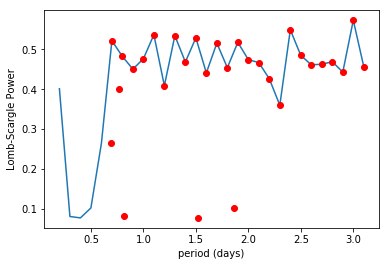

In [117]:
plt.plot(actualperiod, measuredpower)
plt.plot(measuredperiod, measuredpower, 'ro')
plt.xlabel('period (days)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

In [ ]:
plt.plot()